# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

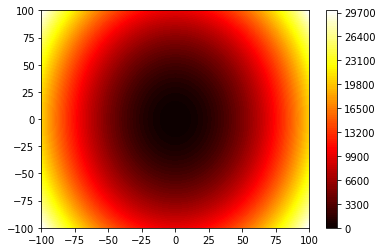

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1 + 0.9 \pi \sin(3 \pi x_1) \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 + 1.6\pi \sin(4 \pi x_2) \\
\end{align*}

In [6]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
    # calculate x_1 and x_2 separately
    dx1 = 2*x[:,0] + 0.9*np.pi*np.sin(3*np.pi*x[:,0])
    dx2 = 4*x[:,1] + 1.6*np.pi*np.sin(4*np.pi*x[:,1])
    # write them to a column_stack to transpose
    grad = np.column_stack((dx1, dx2))
    
    return grad

In [7]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):
    # implementation of the gradient descent function x_t+1 = x_1 - a_t Vf(x)
    x_new = x_old - (self.step_size * self.grad(x_old))
    return x_new

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

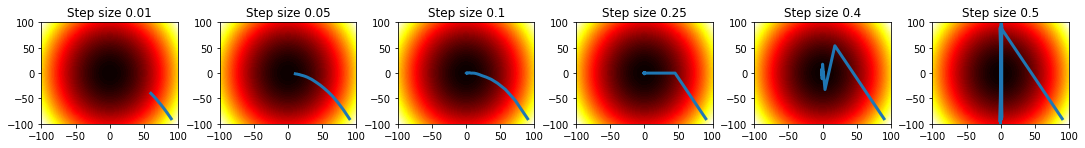

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: 
    We can clearly see from the plots the effect the learning rate (best seen as the chages in the blue line) has on the quality of the optimization function. That is, if it is too small, as it is shown on the left, it approaches the optimum too slowly and (potentially) doesn't reach it in the designated time. On the other hand, too big of a step size/learing rate makes the function 'miss' the optimum because the needed distance to reach it is smaller than the step size itself. Thus, it is important to find a balanced step size.


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: To increase the convergence when the step size is too small, we could consider changing, namely increasing the number of epochs. This would give the code time to reach the optimum if it is too slow otherwise. If the step size is too large, we could cosider using more advanced optimization algorithms. Overall, the best solution is usually to change the step size itself.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** PLEASE FILL IN

*Input:* 


In [27]:
# 1. Define a class called DFO with objective function, range min & max, step_size, and epochs attributes
# 2. Define a subfunction called choose_neighborhood_size that does the following:
#    a. define neighbourhood size list
#    b. eval obj function per size at this point
#    c. loop over neighborhood size rates and eval the obj functions at new points generated
#    d. choose best neighborhood size value based on evals
# 3. Define a method called step that does the following:
#    a. select a neighborhood size using the choose_neighborhood_size method
#    b. loop over number of epochs
#    c. create a new point by adding a random offset to the current point with the chosen neighborhood size from a.
#    d. evalutae the objective function at the new point, if better than at the current point, set the current point to the new point
#    e. return the final point after all loops

In [24]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.


class DFO(object):
    
    #initialize variables, I am using range dynamically, as I am epochs and of course step size
    def __init__(self, obj_fun, range_min, range_max, step_size, epochs):
        self.obj_fun = obj_fun
        self.range_min = range_min
        self.range_max = range_max
        self.step_size = step_size
        self.epochs = epochs

    def choose_neighborhood_size(self):
        #defining three different neighborhood size rates to compare
        neighborhood_size_rates = [25, 50, 75]
        
        #initializing the best neighborhood size rate to the current step size
        best_size_rate = self.step_size
        
        #evaluating the objective function at the current point
        x = np.random.uniform(self.range_min, self.range_max, (1,2))
        fx_old = self.obj_fun(x)
        
        #looping over the nsr and evaluate f at the new points generated with each neighborhood size
        for size_rate in neighborhood_size_rates:
            #computing the neighborhood size based on the rate and the *current* step size
            neighborhood_size = size_rate * self.step_size
            
            #generating a new point with the current neighborhood size
            x_new = x + np.random.uniform(-neighborhood_size, neighborhood_size, (1,2))
            
            #evaluating the objective function at the new point
            fx_new = self.obj_fun(x_new)
            
            #updating the best neighborhood size rae to see if the new point better
            if fx_new < fx_old:
                best_size_rate = neighborhood_size
        
        #returning the best neighborhood size
        return best_size_rate


    def step(self, x_old):
        
        #run neighborhood size optimization subfunction
        neighborhood_size = self.choose_neighborhood_size()
        
        #run epoch times
        for i in range(self.epochs):
            
            # most important, creates a new uniformly random point within neighborhood to compare current to
            x_new = x_old + np.random.uniform(-neighborhood_size, neighborhood_size, (1,2))
            
            #evalutaes which point better
            if self.obj_fun(x_new) < self.obj_fun(x_old):
                x_old = x_new
                
        return x_old

    
        

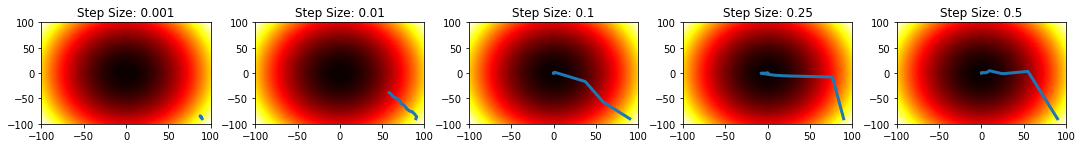

In [25]:

#setting the no of epochs for optimization
epochs = 20

#creating a list of step sizes to attempt
step_size = [0.001, 0.01 ,0.1, 0.25, 0.5]

#given code, added no of graphs to match step sizes
fig_dfo, axs = plt.subplots(1, len(step_size), figsize=(15, 2))
fig_dfo.tight_layout()

#looping over the step size list, and calling the function with the above defined params
for i in range(len(step_size)):
    dfo = DFO(f, -100, 100, step_size[i], epochs)
    plot_optimization_process(axs[i], optimizer=dfo, title=f'Step Size: {step_size[i]}')



**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

I implemented a random search DFO, which generates a random new point with random offset from he current one and evaluates them against each other. In general it is used when we want to make sure it doens't get stuck as gradient descent can, in local minima but this is not the case here. Then I decided to include comprehensive neighborhood selection based on the fact I first accidentally used the step size as neighborhood and thus it was moving too slow, and when i used range it went outside the graph which isn't exactly good. So I made an extra function which finds the best neighborhood size and implements that for each stepsize. This has a rather great effect on the algorithm, even making the graphs look quite similar to the algorithm from the first exercise! This is the algorithms greatest point, as random search is otherwise not so smart. It is very computationally eficient however, which can be extrmeely useful on more complex problems.

I would also like to mention I spent over 4 hours trying to implement negtive hill climbinf before finally giving up. After 50 lines of code, nd changind the predefnined code I had to give up for my own sanity, but I hope the effort will be appreciated nonetheless. 

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: Given the objective function as defined in the beggining, the gradient descent algorithm uses the slope of the function wrt to model params to approach the minimum and find it. We can also see that when the step size is appropriate, the algorithm tends to follow a somehwat smooth or direct line towrds the minimum, like a ball rolling down a hill. This can be seen best with step size 0.1 and 0.5 which give a rather beatiful curve. On the other hand the random search DFO i implemented has no knolwedge of the shape of the graph, and thus evaluates the points rhather than the gradient itself. This way, it finds good 'regions' of the graph and moves step by step there, sometimes slower, sometimes faster. It needs more params to work but with some help it approached the shape of the gradient decsent graph well enough and found the minimum as well.

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: Gradient descent seems to be rather standard in the industry, but it definetly depends on the problem. DFOs are on the other hand more exploratory when it comes to the exploration vs exploitation tradeoff and are good when the function is noisy, multi-modal or non-convex or has multiple local minima which gradient descent can get easily stuck in in its base form. For me, gradient descent was easier to impleement because it is essentially mathematics and once you dial in the correct step size, it should be pretty straightforward. On the other hand the DFO has more parameters to consider and in this case it was harder to implement for me personally. Computationally, calcualting the gradient can be intensive on the resources and this would present an extra reason to go with derivative free methods instead, but if it is known, such as in this case it converges faster. Overall gradient descent is more elegant & robust but DFO is sometimes necessary for specific tasks.